In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [1]:
pip install -U numpy

     ---------------------------------------- 14.7/14.7 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires libclang>=13.0.0, which is not installed.
tensorflow 2.9.1 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 2.0 which is incompatible.
tensorflow 2.9.1 requires gast<=0.4.0,>=0.2.1, but you have gast 0.5.3 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)
#68*32=2176

68

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 2 1 1 1 1 1 1 0 0 0 2 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())


[[[140. 128. 138.]
  [134. 122. 132.]
  [148. 136. 146.]
  ...
  [131. 118. 127.]
  [128. 115. 124.]
  [125. 112. 121.]]

 [[134. 122. 132.]
  [129. 117. 127.]
  [140. 128. 138.]
  ...
  [126. 113. 122.]
  [127. 114. 123.]
  [129. 116. 125.]]

 [[134. 122. 132.]
  [128. 116. 126.]
  [129. 117. 127.]
  ...
  [122. 109. 118.]
  [127. 114. 123.]
  [132. 119. 128.]]

 ...

 [[150. 138. 148.]
  [150. 138. 148.]
  [152. 140. 150.]
  ...
  [137. 124. 133.]
  [140. 127. 136.]
  [147. 134. 143.]]

 [[152. 140. 150.]
  [150. 138. 148.]
  [150. 138. 148.]
  ...
  [141. 128. 137.]
  [143. 130. 139.]
  [150. 137. 146.]]

 [[156. 144. 154.]
  [152. 140. 150.]
  [151. 139. 149.]
  ...
  [145. 132. 141.]
  [146. 133. 142.]
  [153. 140. 149.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


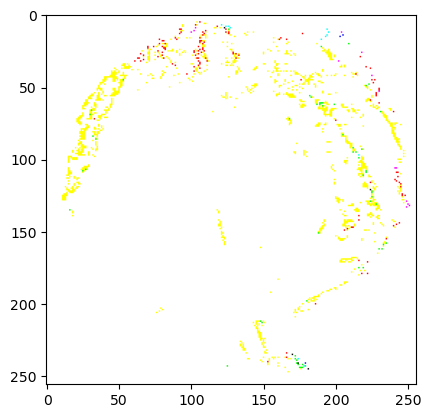

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())


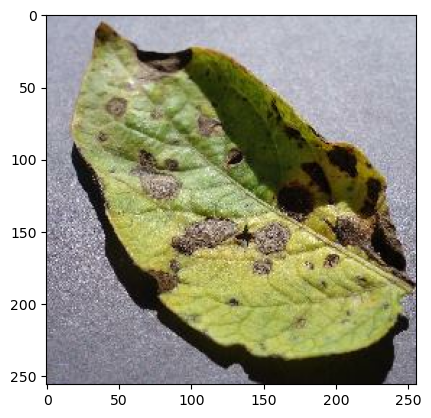

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

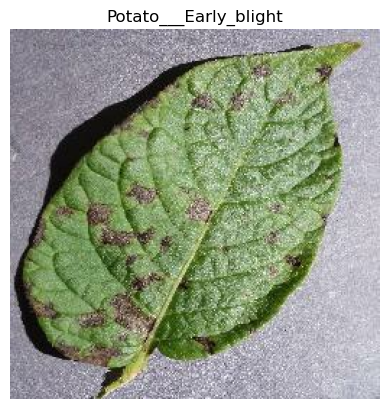

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")

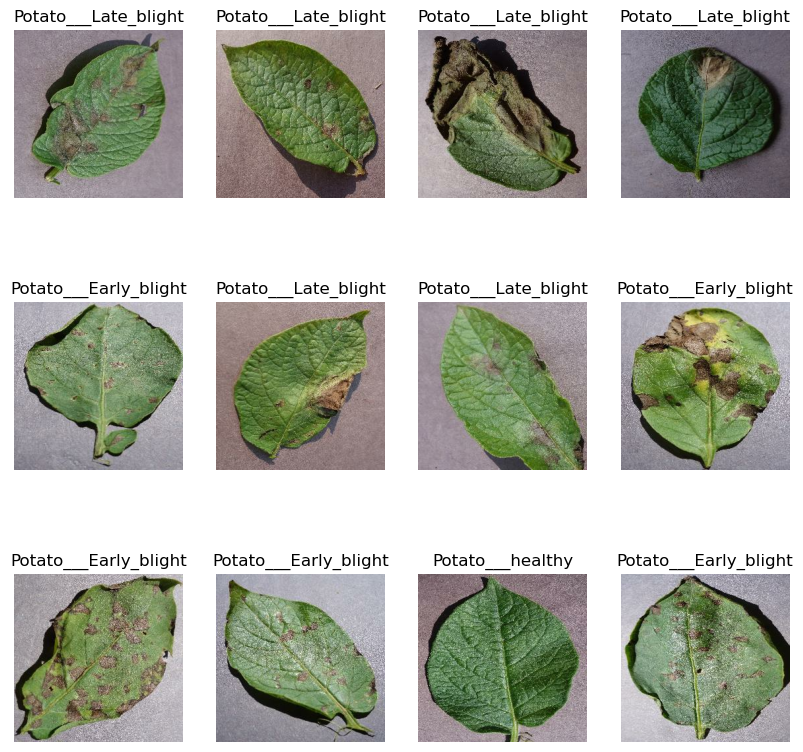

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    #out of first batch 32 images lets print 12 images
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [15]:
len(dataset)
#actual length =68*32

68

In [16]:
#80%->training
#20%-> 10% validation 10% to test(to know accuracy of model)

In [18]:
train_size = 0.6
len(dataset)*train_size

40.8

In [19]:
train_ds = dataset.take(41)  #first 54 like arr[:54]
len(train_ds)

41

In [20]:
test_ds = dataset.skip(41)  #arr[54:]
len(test_ds)

27

In [22]:
val_size=0.2         #validation size is 10%
len(dataset)*val_size

13.600000000000001

In [23]:
val_ds = test_ds.take(14)  #we need 6 samples out of them
len(val_ds)

14

In [24]:
test_ds = test_ds.skip(14)
len(test_ds)   #actual test dataset

13

In [25]:
#to take the tf data set also take split 
def get_dataset_partitions_tf(ds, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

40

In [28]:
len(val_ds)

13

In [29]:
len(test_ds)

15

In [30]:
#cache will read the image from the disk and then for the next iteration need the same image it will keep in memeory this will increase efficiency of pipeline
#prefetch will load the next set of data set batch from disk and it will improve performance
#simply saves time
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
#make sure that every image is 256/256 for modeling preprocessing.we can add that as a layer in our Sequential Model

In [32]:
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data
#supplying an image which is rotated or which is different from contrast so we use data augmentation
#orginal image into 4 parts
#1->Horizontal flip   2->contrast   3->rotation   4->zoom
#4 new training samples

In [33]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [34]:
#we loaded our data and we did some preprocessing to make it ready for model training(CNN)

In [35]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    #activation layer popular activation layer is 'relu' for hidden layers is always relu beacuse it is very fast to compute
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    #pooling layer 
    #(convolutionallayer+pooling)+(convolutionallayer+pooling)+.......... and so on
    layers.MaxPooling2D((2, 2)),
    #trial and error add layers and remove layers
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # after all convolutionallayer+pooling we need to flatten it 
    layers.Flatten(),
    #add dense layer of 64 neurons
    layers.Dense(64, activation='relu'),
    # last layer will have 3 neurons with softmax activation function i.e it will normalize the probability of our classes
    layers.Dense(n_classes, activation='softmax'),
    
])
#and last we need model.build our API needs it
model.build(input_shape=input_shape)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [37]:
#compiling 
#We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric
#adam is a famous optimizer

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
40/40 [==============================] - 45s 940ms/step - loss: 0.9264 - accuracy: 0.4797 - val_loss: 0.9041 - val_accuracy: 0.4663
Epoch 2/50
40/40 [==============================] - 37s 936ms/step - loss: 0.8504 - accuracy: 0.5766 - val_loss: 0.8143 - val_accuracy: 0.5288
Epoch 3/50
40/40 [==============================] - 40s 1s/step - loss: 0.6123 - accuracy: 0.7266 - val_loss: 0.4216 - val_accuracy: 0.8173
Epoch 4/50
40/40 [==============================] - 41s 1s/step - loss: 0.4252 - accuracy: 0.8211 - val_loss: 0.3743 - val_accuracy: 0.8245
Epoch 5/50
40/40 [==============================] - 42s 1s/step - loss: 0.3049 - accuracy: 0.8664 - val_loss: 0.2839 - val_accuracy: 0.8654
Epoch 6/50
40/40 [==============================] - 41s 1s/step - loss: 0.2287 - accuracy: 0.9141 - val_loss: 0.1923 - val_accuracy: 0.9207
Epoch 7/50
40/40 [==============================] - 42s 1s/step - loss: 0.1906 - accuracy: 0.9203 - val_loss: 0.1560 - val_accuracy: 0.9471
Epoch 8/50
40/

In [40]:
scores = model.evaluate(test_ds)


15/15 [==============================] - 7s 290ms/step - loss: 0.0655 - accuracy: 0.9875


In [41]:
scores
#[loss,accuracy]
#model is very good in accuracy

[0.06554701179265976, 0.987500011920929]

In [42]:
history

In [43]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 40}

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
#loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch
type(history.history['loss'])

list

In [46]:
len(history.history['loss'])

50

In [47]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9263522028923035,
 0.8503850698471069,
 0.6122599840164185,
 0.4251767098903656,
 0.30494171380996704]

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

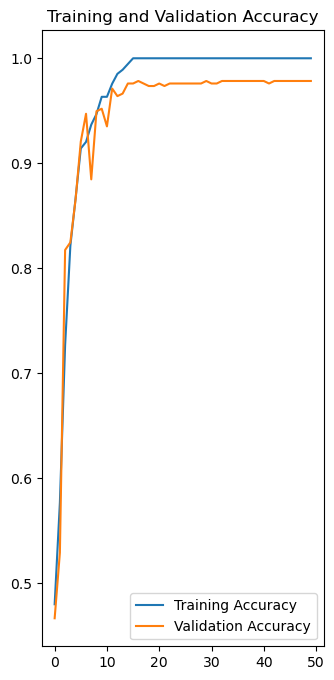

In [49]:
#matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

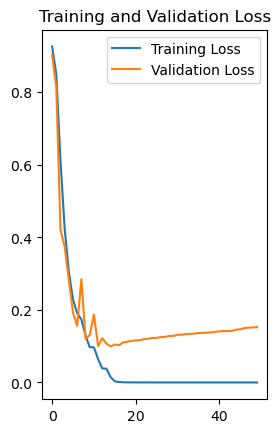

In [50]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


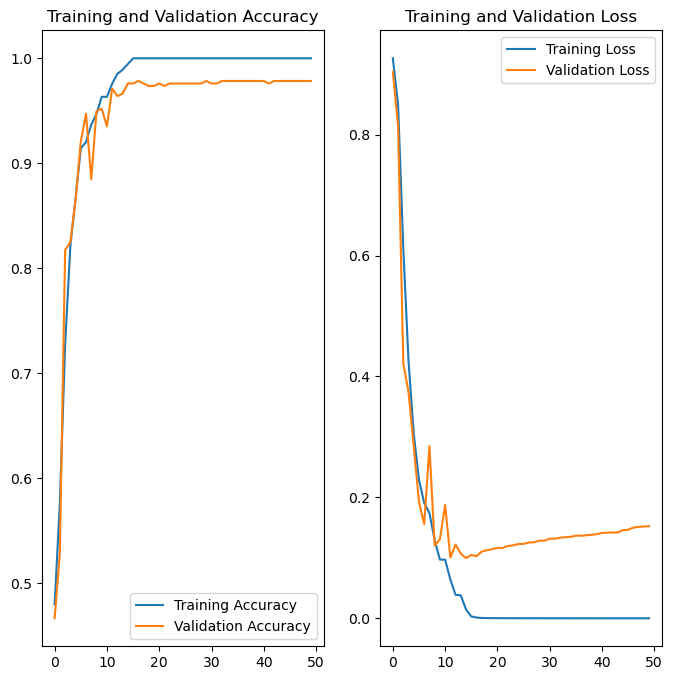

In [51]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#epochs on the x-axis and accuracy on y-axis

In [52]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))
    #3 dimensinal array RGB

[[[185 189 201]
  [185 189 201]
  [188 192 204]
  ...
  [154 155 173]
  [138 139 157]
  [138 139 157]]

 [[193 197 209]
  [185 189 201]
  [178 182 194]
  ...
  [154 155 173]
  [121 122 140]
  [142 143 161]]

 [[190 194 206]
  [189 193 205]
  [194 198 210]
  ...
  [130 131 149]
  [179 180 198]
  [180 181 199]]

 ...

 [[162 164 177]
  [160 162 175]
  [156 158 171]
  ...
  [101  99 112]
  [134 132 145]
  [134 132 145]]

 [[160 162 175]
  [157 159 172]
  [155 157 170]
  ...
  [205 203 216]
  [201 199 212]
  [105 103 116]]

 [[153 155 168]
  [152 154 167]
  [153 155 168]
  ...
  [ 96  94 107]
  [105 103 116]
  [137 135 148]]]


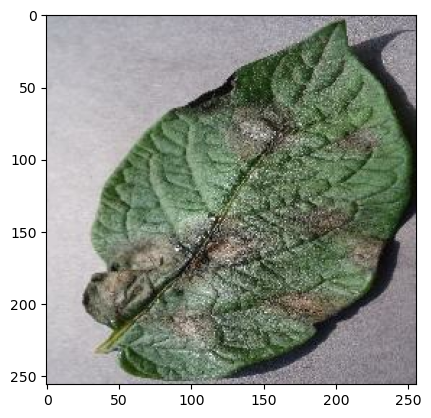

In [53]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
#actual image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 966ms/step
predicted label: Potato___Late_blight


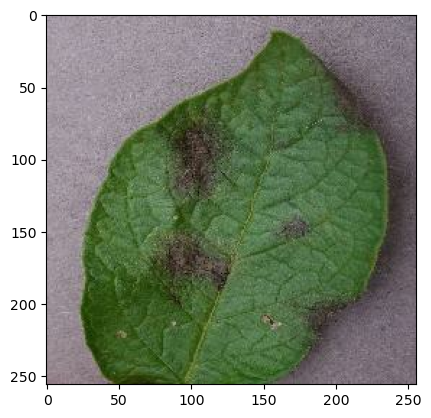

In [54]:
#Run prediction on a sample image
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    #we are taking 1 batch
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [55]:
# predict function will take model and image as input and gives predictedclass and confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #create a batch
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


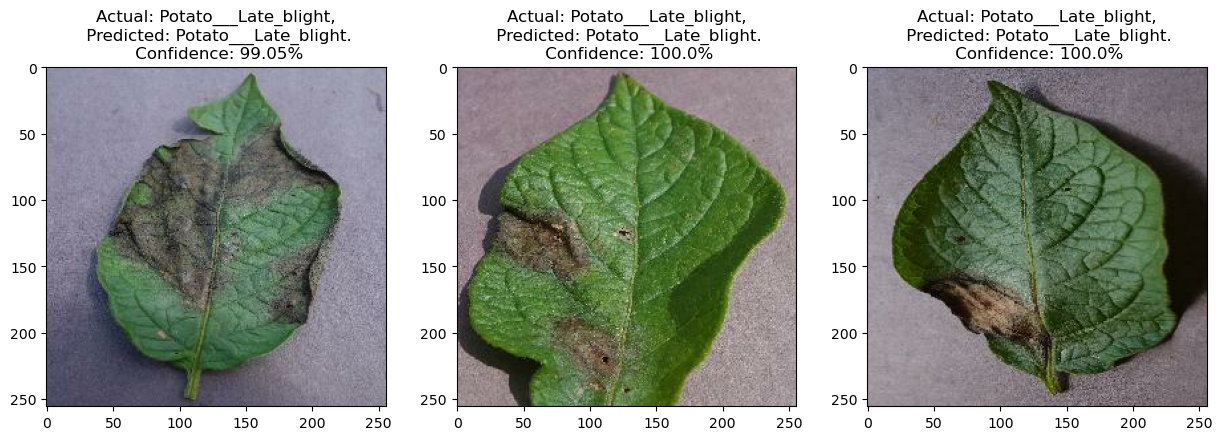

In [56]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        